In [55]:
import pandas as pd

file_url = 'https://raw.githubusercontent.com/ajayt0m/Forecasting_Crop_Prices_Maharashtra/main/onion_daily_cleaned.csv'

onion_df = pd.read_csv(file_url)

In [39]:
#Set index as date
onion_df.index  = pd.to_datetime(onion_df['date_arrival'], format = '%Y-%m-%d')

In [40]:
onion_df['date_arrival'] = pd.to_datetime(onion_df['date_arrival'], format = '%Y-%m-%d')

In [57]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(onion_df.head(10))

,date_arrival,MIN,MAX,MODAL,Arrival
0,2021-01-01,865.145833,2706.875000,2060.604167,11575.0
1,2021-01-02,1105.066667,2720.155556,2181.844444,15560.0
2,2021-01-03,1129.411765,2741.470588,2141.176471,3954.0
3,2021-01-04,967.306122,2754.163265,2167.551020,21441.0
4,2021-01-05,1188.836735,2793.714286,2275.469388,21526.0
5,2021-01-06,1335.294118,2698.000000,2242.647059,7103.0
6,NaN,1335.294118,2698.000000,2242.647059,7103.0
7,NaN,1335.294118,2698.000000,2242.647059,7103.0
8,2021-01-09,1160.000000,3223.000000,2832.400000,3389.0
9,2021-01-10,633.333333,3366.666667,2375.000000,394.0


In [58]:
onion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_arrival  1000 non-null   object 
 1   MIN           1004 non-null   float64
 2   MAX           1004 non-null   float64
 3   MODAL         1004 non-null   float64
 4   Arrival       1004 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.3+ KB


<AxesSubplot: >

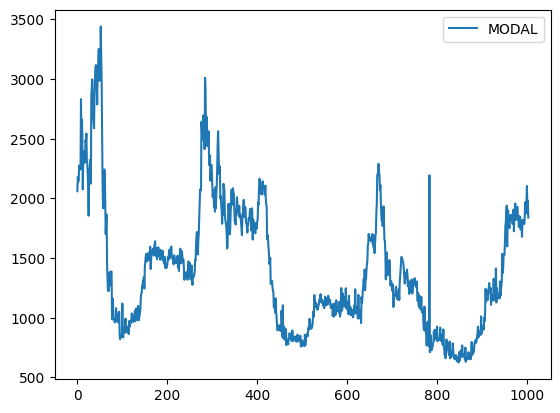

In [59]:
price = pd.DataFrame(onion_df['MODAL'])
price.plot()

In [60]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(price.head(10))

,MODAL
0,2060.604167
1,2181.844444
2,2141.176471
3,2167.551020
4,2275.469388
5,2242.647059
6,2242.647059
7,2242.647059
8,2832.400000
9,2375.000000


In [44]:
import numpy as np

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [45]:
WINDOW_SIZE = 15
X, y = df_to_X_y(price, WINDOW_SIZE)
X.shape, y.shape

((989, 15, 1), (989,))

In [46]:
X

array([[[2060.60416667],
        [2181.84444444],
        [2141.17647059],
        ...,
        [2076.5       ],
        [2319.15789474],
        [2391.25      ]],

       [[2181.84444444],
        [2141.17647059],
        [2167.55102041],
        ...,
        [2319.15789474],
        [2391.25      ],
        [2394.59375   ]],

       [[2141.17647059],
        [2167.55102041],
        [2275.46938776],
        ...,
        [2391.25      ],
        [2394.59375   ],
        [2298.80952381]],

       ...,

       [[1738.88888889],
        [1765.25531915],
        [1811.44      ],
        ...,
        [1878.11764706],
        [1978.39393939],
        [2104.41176471]],

       [[1765.25531915],
        [1811.44      ],
        [1678.88888889],
        ...,
        [1978.39393939],
        [2104.41176471],
        [1874.2962963 ]],

       [[1811.44      ],
        [1678.88888889],
        [1819.25891304],
        ...,
        [2104.41176471],
        [1874.2962963 ],
        [1982.        ]]

In [47]:
X_train, y_train = X[:800], y[:800]
X_val, y_val = X[800:900], y[800:900]
X_test, y_test = X[900:], y[900:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((800, 15, 1), (800,), (100, 15, 1), (100,), (89, 15, 1), (89,))

In [49]:
y_test

array([1245.83216667, 1291.2047619 , 1210.59814815, 1206.83333333,
       1252.26923077, 1108.48368421, 1195.56984127, 1171.25515625,
       1185.86609375, 1143.76113208, 1148.89583333, 1326.92857143,
       1149.901875  , 1256.03413793, 1202.806     , 1212.5421875 ,
       1414.05578947, 1129.22886792, 1248.93333333, 1162.05283333,
       1166.27967213, 1184.36318182, 1191.72298246, 1204.60226415,
       1162.70967742, 1304.71875   , 1184.24946429, 1256.27676471,
       1261.51765625, 1306.14833333, 1535.75333333, 1373.93877551,
       1406.93103448, 1521.04175439, 1535.14      , 1526.86963636,
       1629.0515873 , 1765.82207547, 1803.40909091, 1866.24137931,
       1940.02439024, 1598.5       , 1846.81818182, 1901.61814815,
       1858.09090909, 1802.04166667, 1750.25      , 1840.97560976,
       1831.78378378, 1861.85294118, 1817.04071429, 1862.65306122,
       1826.        , 1788.54166667, 1810.1627907 , 1906.70454545,
       1725.        , 1837.94      , 1828.3877551 , 1957.6    

In [16]:
price_training_mean = np.mean(X_train[:, :, 0])
price_training_std = np.std(X_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - price_training_mean) / price_training_std 
  return X

In [17]:
price_training_mean

1463.232494093991

In [18]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

array([[[-1.01823811],
        [-1.0591576 ],
        [-1.00207892],
        ...,
        [-0.44358   ],
        [-0.58650494],
        [-0.43392152]],

       [[-1.0591576 ],
        [-1.00207892],
        [-1.00129697],
        ...,
        [-0.58650494],
        [-0.43392152],
        [-0.4071577 ]],

       [[-1.00207892],
        [-1.00129697],
        [-1.05046117],
        ...,
        [-0.43392152],
        [-0.4071577 ],
        [-0.32218174]],

       ...,

       [[ 0.51626244],
        [ 0.56564274],
        [ 0.65213962],
        ...,
        [ 0.77701669],
        [ 0.96481891],
        [ 1.2008311 ]],

       [[ 0.56564274],
        [ 0.65213962],
        [ 0.40389158],
        ...,
        [ 0.96481891],
        [ 1.2008311 ],
        [ 0.76985988]],

       [[ 0.65213962],
        [ 0.40389158],
        [ 0.66678325],
        ...,
        [ 1.2008311 ],
        [ 0.76985988],
        [ 0.97157251]]])

In [19]:
def preprocess_output(y):
  y = (y - price_training_mean) / price_training_std 
  return y

In [20]:
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

array([-0.4071577 , -0.32218174, -0.47314565, -0.48019657, -0.39510206,
       -0.66439048, -0.50129138, -0.54682908, -0.51946502, -0.5983212 ,
       -0.58870468, -0.25527648, -0.58682052, -0.38805096, -0.48773915,
       -0.46950476, -0.09210048, -0.62553791, -0.40134968, -0.56406363,
       -0.5561474 , -0.52227974, -0.50849596, -0.48437502, -0.56283346,
       -0.2968721 , -0.52249272, -0.38759656, -0.37778116, -0.2941947 ,
        0.13582048, -0.16723353, -0.10544406,  0.10826794,  0.1346718 ,
        0.11918267,  0.3105539 ,  0.56670419,  0.63709895,  0.75477425,
        0.89295859,  0.25333543,  0.71839756,  0.82102955,  0.73950966,
        0.63453797,  0.53754007,  0.70745531,  0.69024042,  0.74655537,
        0.6626289 ,  0.74805388,  0.67940828,  0.60925453,  0.6497476 ,
        0.8305556 ,  0.49025066,  0.70177008,  0.68388018,  0.92587503,
        0.66862067,  0.79809455,  0.81425583,  0.86807538,  0.87370242,
        0.66761332,  0.72766677,  0.5603784 ,  0.72595635,  0.67

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((15, 1)))
model1.add(LSTM(136, activation='relu'))
model1.add(Dense(1))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 136)               75072     
                                                                 
 dense (Dense)               (None, 1)                 137       
                                                                 
Total params: 75209 (293.79 KB)
Trainable params: 75209 (293.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [23]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp1])

Epoch 1/20
23/25 [==========================>...] - ETA: 0s - loss: 2389042.5000 - root_mean_squared_error: 1545.6528INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 3s 81ms/step - loss: 2376461.7500 - root_mean_squared_error: 1541.5776 - val_loss: 629215.1875 - val_root_mean_squared_error: 793.2308
Epoch 2/20
24/25 [===========================>..] - ETA: 0s - loss: 2388216.2500 - root_mean_squared_error: 1545.3855INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 66ms/step - loss: 2376152.2500 - root_mean_squared_error: 1541.4773 - val_loss: 628944.3750 - val_root_mean_squared_error: 793.0601
Epoch 3/20
22/25 [=========================>....] - ETA: 0s - loss: 2373136.5000 - root_mean_squared_error: 1540.4988INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 70ms/step - loss: 2375695.5000 - root_mean_squared_error: 1541.3291 - val_loss: 628461.6250 - val_root_mean_squared_error: 792.7557
Epoch 4/20
24/25 [===========================>..] - ETA: 0s - loss: 2382907.7500 - root_mean_squared_error: 1543.6670INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 66ms/step - loss: 2374424.7500 - root_mean_squared_error: 1540.9169 - val_loss: 626299.1250 - val_root_mean_squared_error: 791.3906
Epoch 5/20
23/25 [==========================>...] - ETA: 0s - loss: 2325738.5000 - root_mean_squared_error: 1525.0372INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 1s 61ms/step - loss: 2303913.2500 - root_mean_squared_error: 1517.8647 - val_loss: 459659.1250 - val_root_mean_squared_error: 677.9816
Epoch 6/20
25/25 [==============================] - 0s 11ms/step - loss: 1918392.7500 - root_mean_squared_error: 1385.0605 - val_loss: 3032523.0000 - val_root_mean_squared_error: 1741.4141
Epoch 7/20
25/25 [==============================] - 0s 12ms/step - loss: 1715814.7500 - root_mean_squared_error: 1309.8911 - val_loss: 2770008.2500 - val_root_mean_squared_error: 1664.3342
Epoch 8/20
25/25 [==============================] - 0s 10ms/step - loss: 1585426.3750 - root_mean_squared_error: 1259.1372 - val_loss: 939778.0000 - val_root_mean_squared_error: 969.4214
Epoch 9/20
25/25 [==============================] - 0s 10ms/step - loss: 1375789.2500 - root_mean_squared_error: 1172.9404 - val_loss: 1249273.0000 - val_root_mean_squared_error: 1117.7089
Epoch 10/20
25/25 [==============================] - 0s 10ms/step - lo

INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 70ms/step - loss: 305160.0938 - root_mean_squared_error: 552.4130 - val_loss: 394788.5312 - val_root_mean_squared_error: 628.3220
Epoch 16/20
21/25 [========================>.....] - ETA: 0s - loss: 249120.7344 - root_mean_squared_error: 499.1200INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 79ms/step - loss: 255850.0938 - root_mean_squared_error: 505.8163 - val_loss: 322442.0938 - val_root_mean_squared_error: 567.8398
Epoch 17/20
25/25 [==============================] - 0s 10ms/step - loss: 222669.6250 - root_mean_squared_error: 471.8788 - val_loss: 379890.5625 - val_root_mean_squared_error: 616.3526
Epoch 18/20
23/25 [==========================>...] - ETA: 0s - loss: 204429.9844 - root_mean_squared_error: 452.1393INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 81ms/step - loss: 201053.5156 - root_mean_squared_error: 448.3899 - val_loss: 259054.4844 - val_root_mean_squared_error: 508.9739
Epoch 19/20
24/25 [===========================>..] - ETA: 0s - loss: 187035.1406 - root_mean_squared_error: 432.4756INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 77ms/step - loss: 185512.8594 - root_mean_squared_error: 430.7120 - val_loss: 164388.8594 - val_root_mean_squared_error: 405.4490
Epoch 20/20
24/25 [===========================>..] - ETA: 0s - loss: 164901.4219 - root_mean_squared_error: 406.0806INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 68ms/step - loss: 163026.1719 - root_mean_squared_error: 403.7650 - val_loss: 157598.5781 - val_root_mean_squared_error: 396.9869


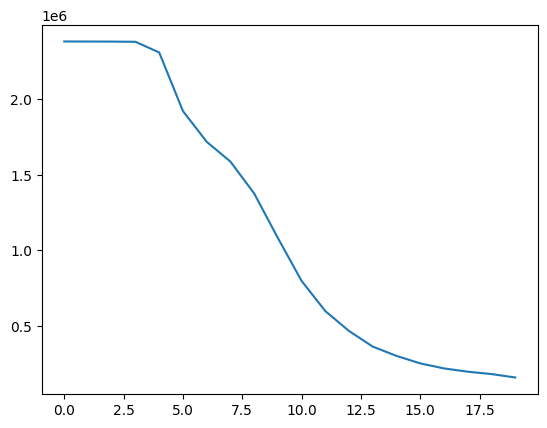

In [24]:
import matplotlib.pyplot as plt

loss_per_epoch = model1.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [25]:
def postprocess(arr):
  arr = (arr*price_training_std) + price_training_mean
  return arr

In [26]:
def get_predictions_postprocessed(model, X, y):
  predictions = model.predict(X).flatten()
  price_preds = postprocess(predictions)
  price_actuals = postprocess(y)
  df = pd.DataFrame(data={'Price Predictions': price_preds,
                          'Price Actuals':price_actuals,
                          })
  return df

In [27]:
post_processed_df = get_predictions_postprocessed(model1, X_test, y_test)
post_processed_df

3/3 [==============================] - 0s 4ms/step


,Price Predictions,Price Actuals
0,588617.2500,6.666707e+05
1,598883.0000,6.908972e+05
2,602898.3125,6.478576e+05
3,617208.6875,6.458474e+05
4,629403.0000,6.701077e+05
...,...,...
84,824857.4375,1.057819e+06
85,826624.6250,1.125106e+06
86,816092.5625,1.002237e+06
87,819019.4375,1.059745e+06


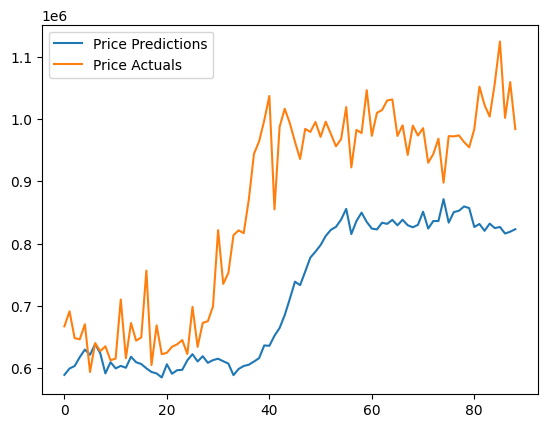

In [33]:
import matplotlib.pyplot as plt

start, end = 0, 100
plt.plot(post_processed_df['Price Predictions'][start:end], label='Price Predictions')
plt.plot(post_processed_df['Price Actuals'][start:end], label='Price Actuals')

plt.legend()
plt.show()

In [36]:
post_processed_df

,Price Predictions,Price Actuals
0,588617.2500,6.666707e+05
1,598883.0000,6.908972e+05
2,602898.3125,6.478576e+05
3,617208.6875,6.458474e+05
4,629403.0000,6.701077e+05
...,...,...
84,824857.4375,1.057819e+06
85,826624.6250,1.125106e+06
86,816092.5625,1.002237e+06
87,819019.4375,1.059745e+06


In [34]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

25/25 [==============================] - 0s 6ms/step


,Train Predictions,Actuals
0,1769.120117,2394.593750
1,1857.514771,2298.809524
2,1822.276001,2324.689655
3,1877.543701,2490.360000
4,1947.283081,2469.961538
...,...,...
795,1068.729370,860.142857
796,1089.259155,852.370370
797,1078.185425,785.359375
798,1090.806152,770.130435


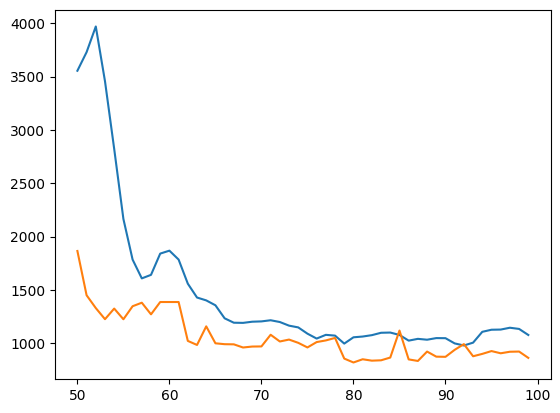

In [35]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])